In [1]:
def getMouseMonitorScreenshot():
    import pyautogui
    import mss
    from PIL import Image
    # Get the current mouse position
    mouse_x, mouse_y = pyautogui.position()

    # Determine the monitor the mouse is on
    with mss.mss() as sct:
        target_monitor = None
        for monitor in sct.monitors[1:]:
            if monitor["left"] <= mouse_x < monitor["left"] + monitor["width"] and monitor["top"] <= mouse_y < monitor["top"] + monitor["height"]:
                target_monitor = monitor
                break

        if target_monitor:
            image = sct.grab(target_monitor)
            return Image.frombytes("RGB", image.size, image.bgra, "raw", "BGRX")
        else:
            return None

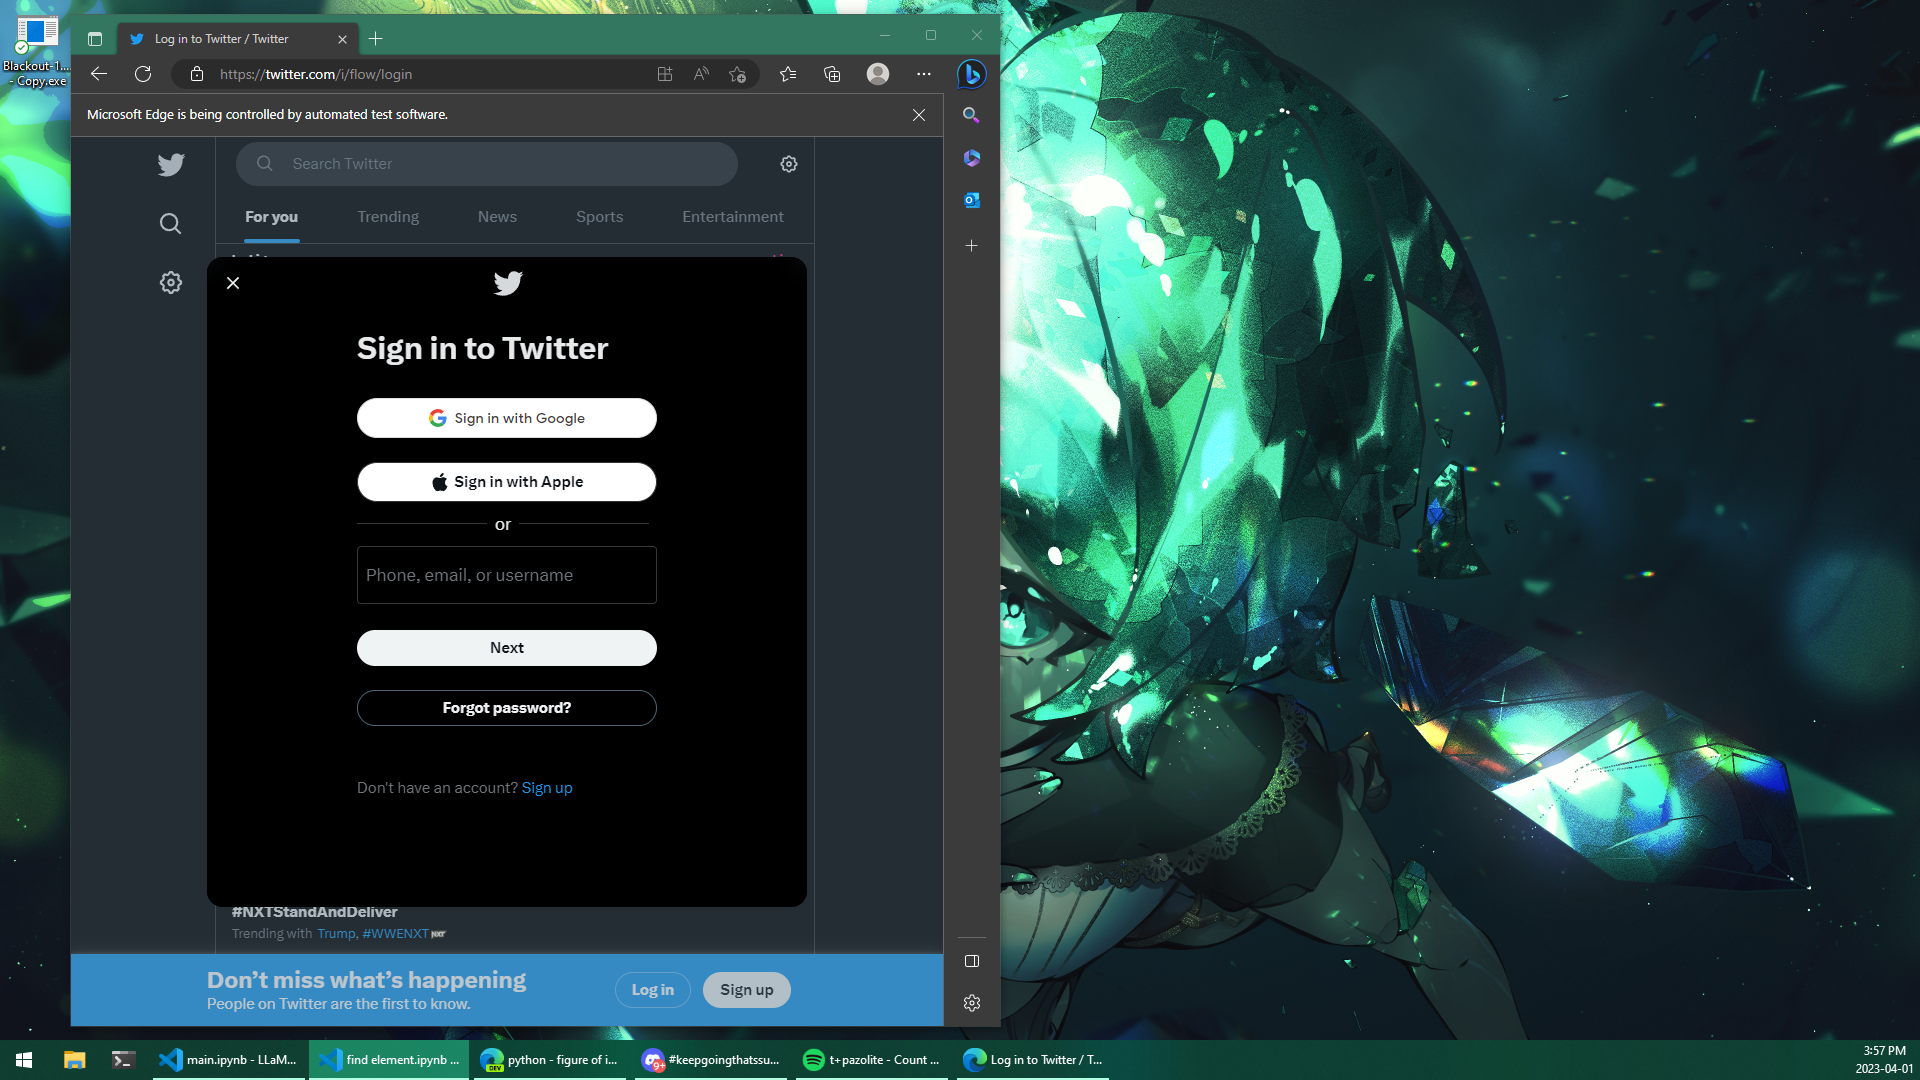

In [27]:
from IPython.display import display, Image
screenshot = getMouseMonitorScreenshot()
display(screenshot)

In [31]:
driver_rect = {'height': 1020, 'width': 945, 'x': 1983, 'y': 14}
driver_rect["x"] -= 1920

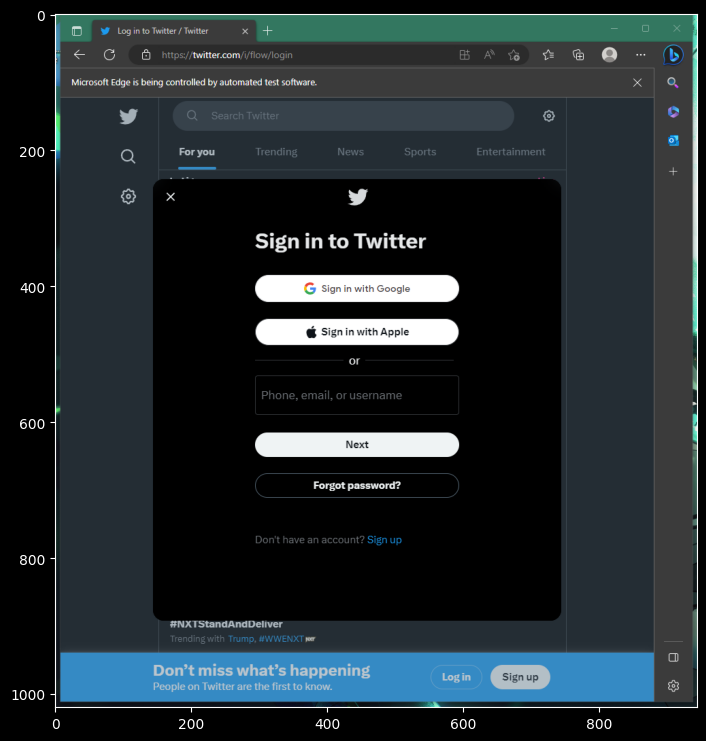

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.cvtColor(np.array(screenshot), cv2.COLOR_RGB2BGR)
image = image[driver_rect['y']:driver_rect['y']+driver_rect['height'], driver_rect['x']:driver_rect['x']+driver_rect['width']]
plt.figure(figsize=(16,9))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [33]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
data = pytesseract.image_to_data(image, lang="eng", output_type=pytesseract.Output.DICT)
print(data)

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'b

Text: Login, Bounding box: (67, 19, 13, 12), Confidence: 59
Text: Twitter, Bounding box: (142, 20, 84, 12), Confidence: 53
Text: Twitter, Bounding box: (192, 20, 34, 12), Confidence: 43
Text: https://twitter.com/i/flow/login, Bounding box: (158, 55, 190, 13), Confidence: 44
Text: Microsoft, Bounding box: (20, 86, 58, 29), Confidence: 55
Text: Edge, Bounding box: (85, 86, 22, 29), Confidence: 95
Text: being, Bounding box: (128, 86, 30, 29), Confidence: 84
Text: controlled, Bounding box: (165, 86, 54, 29), Confidence: 96
Text: automated, Bounding box: (244, 86, 57, 29), Confidence: 96
Text: test, Bounding box: (307, 86, 23, 29), Confidence: 94
Text: software., Bounding box: (334, 86, 54, 29), Confidence: 92
Text: Search, Bounding box: (231, 144, 46, 11), Confidence: 42
Text: Twitter, Bounding box: (281, 144, 48, 11), Confidence: 96
Text: For, Bounding box: (179, 187, 27, 31), Confidence: 72
Text: you, Bounding box: (212, 187, 22, 31), Confidence: 72
Text: Trending, Bounding box: (295, 19

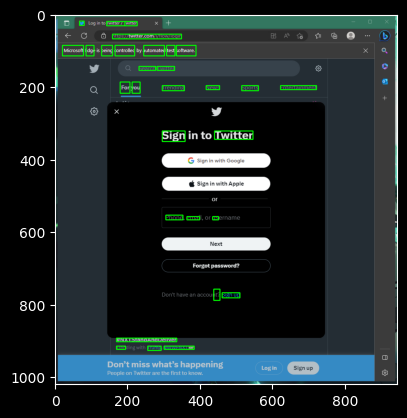

In [34]:

num_boxes = len(data['level'])
for i in range(num_boxes):
    (text, x, y, w, h, conf) = (data['text'][i].strip(), data['left'][i], data['top'][i], data['width'][i], data['height'][i], data['conf'][i])
    if len(text) > 2 and int(conf) > 0:
        print(f"Text: {text}, Bounding box: ({x}, {y}, {w}, {h}), Confidence: {conf}")
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

cv2.imshow('Image with Bounding Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

